<a href="https://www.analytiksinc.com">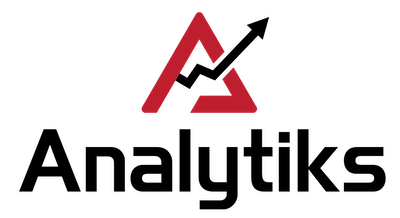</a>
<p style="text-align: right;"> © 2019. Analytiks Inc. </p>

# HIERARCHICAL CLUSTERING

## Import Libraries

### Standard Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

### Additional Libraries

<a href = "https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html">**Hierarchical Clustering**</a>

In [9]:
from scipy.cluster import hierarchy

## Load and Explore the Dataset

In [10]:
#Load the Dataset
df = pd.read_csv('Fleet_data.csv', index_col='Driver_ID')

In [11]:
#Check the number of Samples
df.shape

(4000, 2)

In [12]:
#For Hierarchical Clustering, let's use a small sample to understand the process
df_sample = df.sample(n=30, random_state=123)

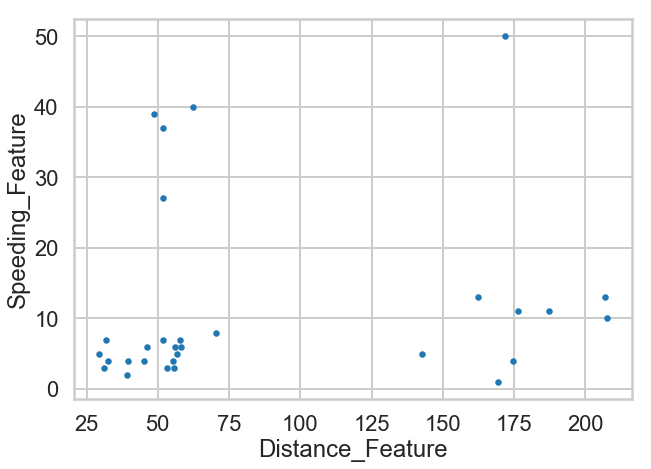

In [13]:
#Visualize/Plot the Sample Data
df_sample.plot(x='Distance_Feature', y='Speeding_Feature',kind='scatter', figsize=(10,7))

## Test with Sample Data

In [14]:
#Instantiate the Algorithm
#Linkage performs hierarchical/agglomerative clustering.

linked = hierarchy.linkage(df_sample, method='single') 

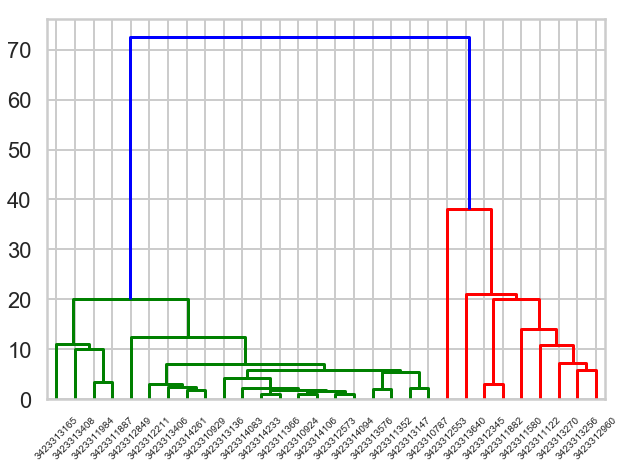

In [15]:
#Plotting the Dendrogram

plt.figure(figsize=(10, 7))  
hierarchy.dendrogram(linked,  
            orientation='top',
            labels=df_sample.index,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

Once one big cluster is formed, the longest vertical distance without any horizontal line passing through it is selected and a horizontal line is drawn through it. The number of vertical lines this newly created horizontal line passes is equal to number of clusters.

One example for this is wine quality.

### Clusters based on distance cut-off

In [18]:
# Set Max Distance: The higher the max distance, the less "distinct" the clusters (fewer clusters) and vice versa. 
max_d = 50

#Generate the Cluster Labels
clusters_d = hierarchy.fcluster(linked, max_d, criterion='distance')

In [25]:
#Create the dataframe
df_sample_dist = df_sample.copy()
df_sample_dist['Label'] = clusters_d
df_sample_dist.head()

,Distance_Feature,Speeding_Feature,Label
Driver_ID,,,
3423313576,39.30,2,1
3423310924,55.30,4,1
3423313147,45.05,4,1
3423313270,176.37,11,2
3423311122,187.16,11,2


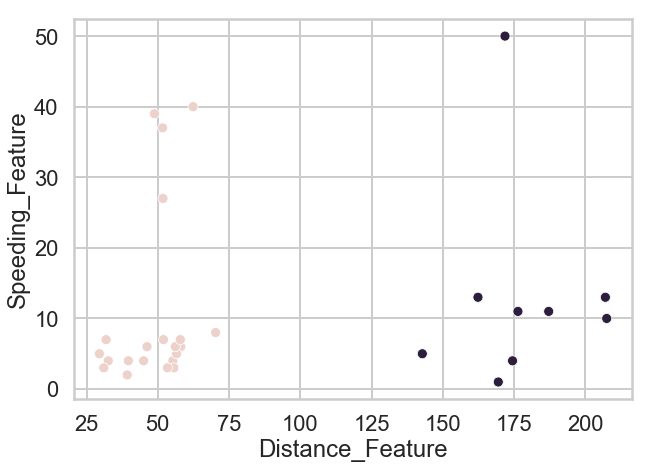

In [26]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_sample_dist.Distance_Feature, y=df_sample_dist.Speeding_Feature, 
                hue=df_sample_dist.Label, s=100, legend=False)

### Clusters based on number of Clusters (k)

In [40]:
#Set number of Clusters
k = 3
clusters_k = hierarchy.fcluster(linked, k, criterion='maxclust')

In [41]:
#Create the dataframe
df_sample_k = df_sample.copy()
df_sample_k['Label'] = clusters_k

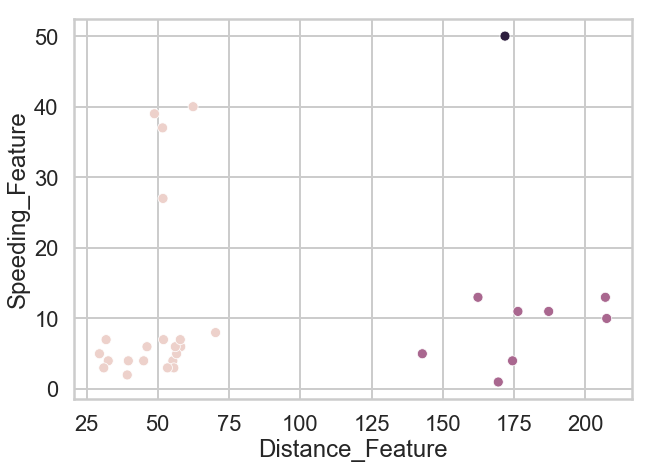

In [42]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_sample_k.Distance_Feature, y=df_sample_k.Speeding_Feature, 
                hue=df_sample_k.Label, s=100, legend=False)

## Test with Full Data

In [43]:
#Instantiate the Algorithm
#Linkage performs hierarchical/agglomerative clustering.

linked_full = hierarchy.linkage(df, method='single') 

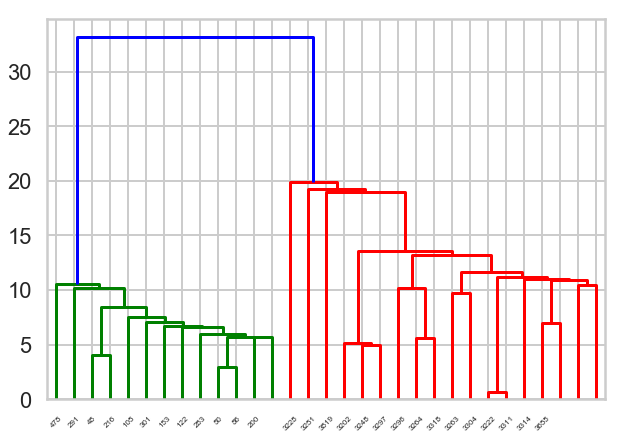

In [44]:
plt.figure(figsize=(10, 7))  
hierarchy.dendrogram(linked_full,  
            orientation='top',
            p=10,
            distance_sort='descending',
            truncate_mode='level',
            show_leaf_counts=False)
plt.show()  

### Test with Max Cluster 3

In [46]:
k = 3

clusters_k_full = hierarchy.fcluster(linked_full, k, criterion='maxclust')

In [47]:
#Create the dataframe
df_k = df.copy()
df_k['Label'] = clusters_k_full

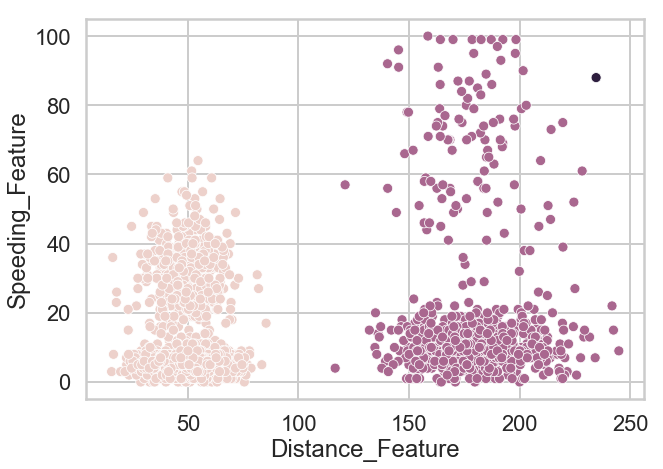

In [48]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_k.Distance_Feature, y=df_k.Speeding_Feature, 
                hue=df_k.Label, s=100, legend=False)

In [54]:
# Set Max Distance: The higher the max distance, the less "distinct" the clusters (fewer clusters) and vice versa. 
max_d = 15

#Generate the Cluster Labels
clusters_d_full = hierarchy.fcluster(linked_full, max_d, criterion='distance')

In [55]:
#Create the dataframe
df_d = df.copy()
df_d['Label'] = clusters_d_full
df_d.head()

,Distance_Feature,Speeding_Feature,Label
Driver_ID,,,
3423311935,71.24,28,1
3423313212,52.53,25,1
3423313724,64.54,27,1
3423311373,55.69,22,1
3423310999,54.58,25,1


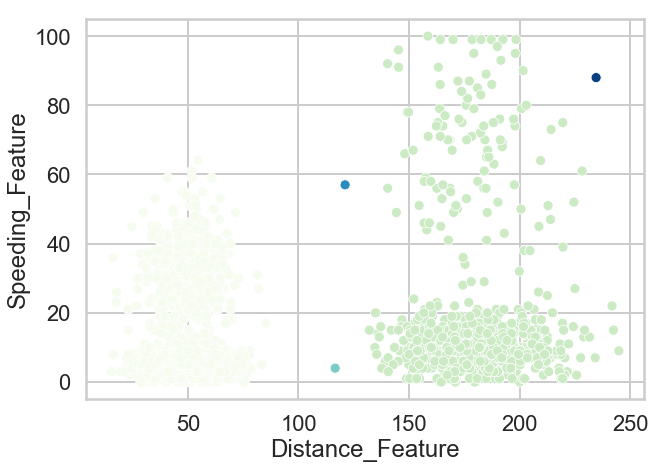

In [64]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(ax = ax, x=df_d.Distance_Feature, y=df_d.Speeding_Feature, 
                hue=df_d.Label, s=100, legend=False, palette='GnBu')